In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [121]:
df = pd.read_csv('hw3.csv')
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2664,2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,NaN,CRV,ETH
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [72]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [73]:
df.duplicated().sum()

307

<AxesSubplot:>

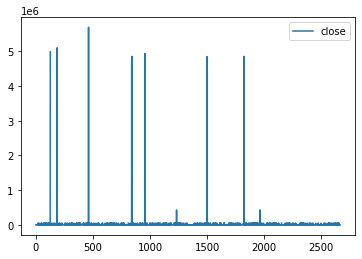

In [74]:
df[['token', 'close']].plot()

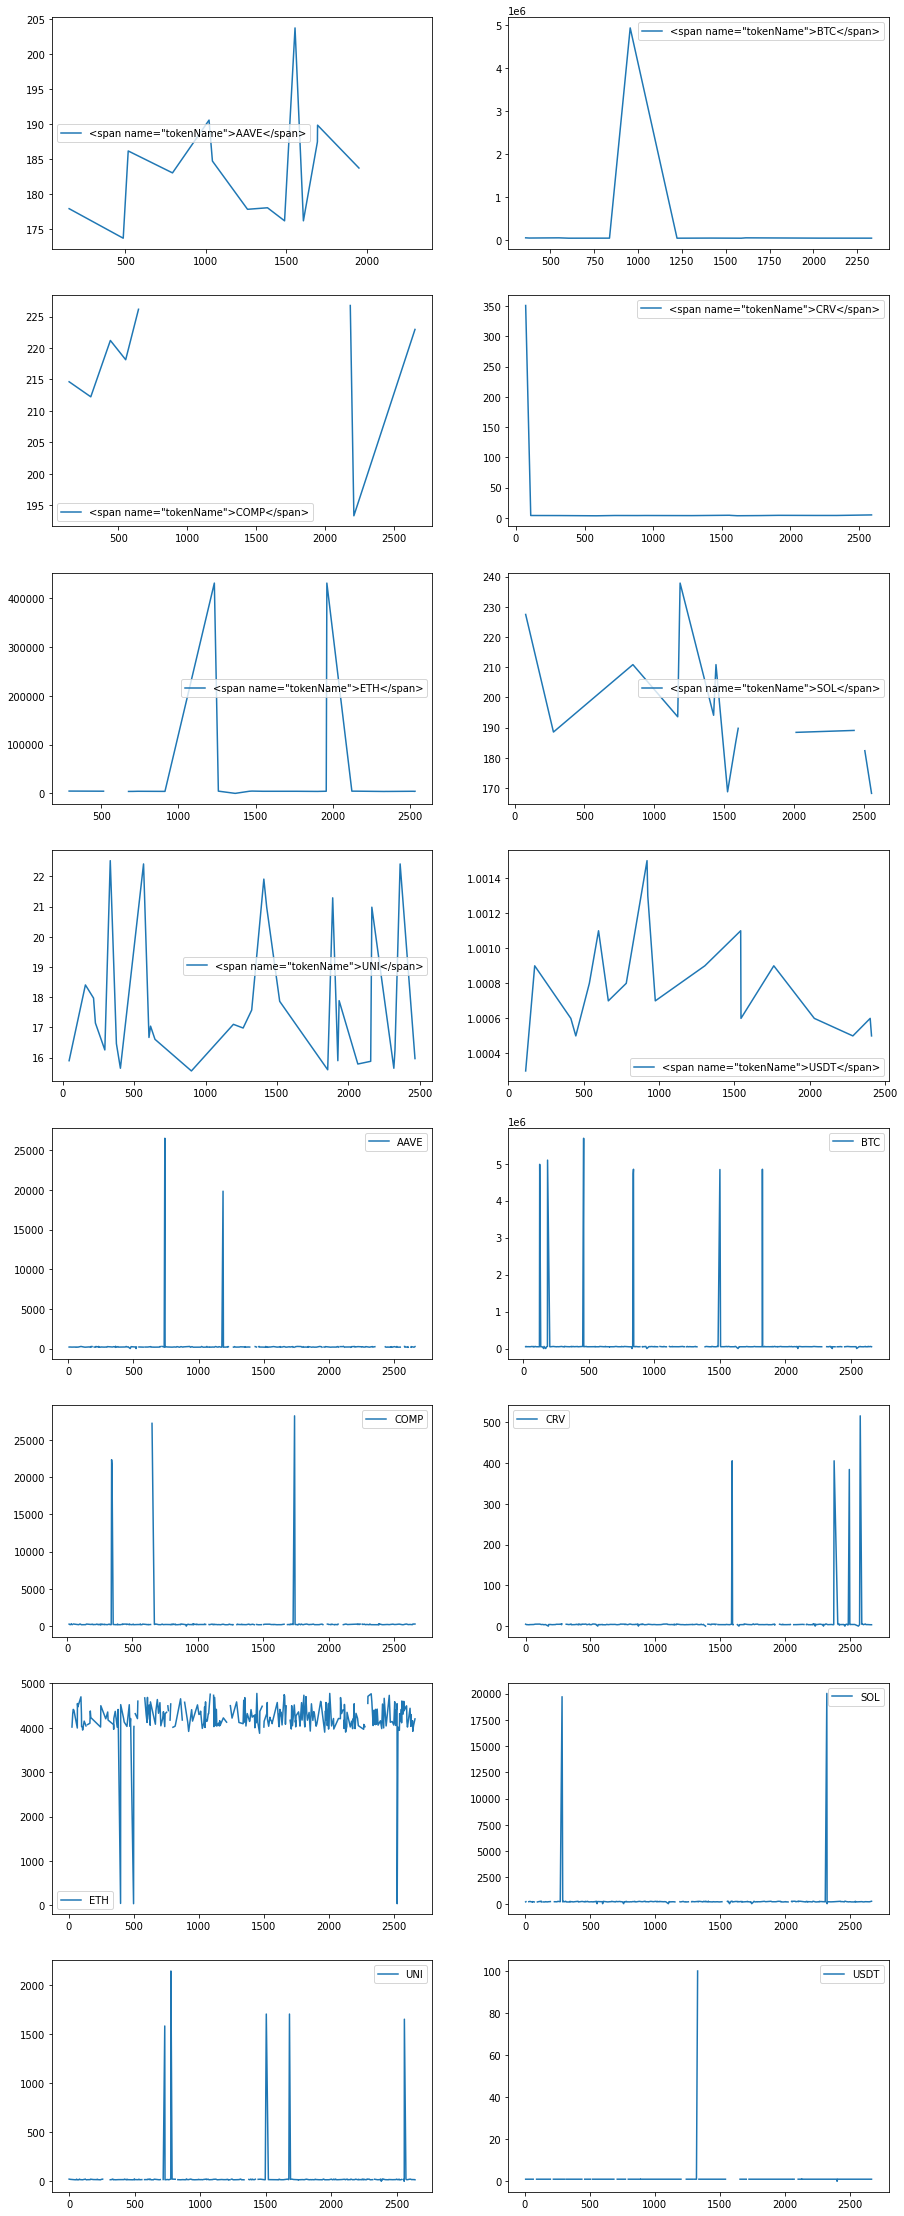

In [75]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [122]:
df = df.drop_duplicates()
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2661,2021-12-01 17:00:00,284.1400,284.8900,282.1800,282.3400,4.782140e+02,NaN,COMP,ETH
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


In [123]:
df.loc[df['token'].str.contains('</span>'), 'token'] = df.loc[df['token'].str.contains('</span>'), 'token'].str.extract('<span name="tokenName">(.|\n)*?</span>')

C:\Users\84132\anaconda3\envs\mfe-preprogram\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [124]:
df['token'].value_counts()

COMP    286
BTC     283
SOL     281
AAVE    280
CRV     279
USDT    278
UNI     270
ETH     270
Name: token, dtype: int64

In [125]:
def fill_na(d,token):
    d = d.set_index(['ts'])
    d.loc[d['token']==token, 'high'] = d.loc[d['token']==token,'high'].sort_index().fillna(method='ffill')
    d.loc[d['token']==token, 'low'] = d.loc[d['token']==token,'low'].sort_index().fillna(method='ffill')
    d = d.reset_index()
    return d
tokens = ['COMP','BTC','SOL','AAVE','CRV','USDT','UNI','ETH']
for token in tokens:
    df = fill_na(df,token)

In [126]:
df[df['token']=='ETH']['high'].isnull().sum()

0

In [127]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

In [128]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])
df.loc[df.close / df.open <= 0.5, 'close'] = 0.5 * (df.loc[df.close / df.open <= 0.5, 'high'] + df.loc[df.close / df.open <= 0.5, 'low'])

In [137]:
df = df.dropna(subset=['close'])

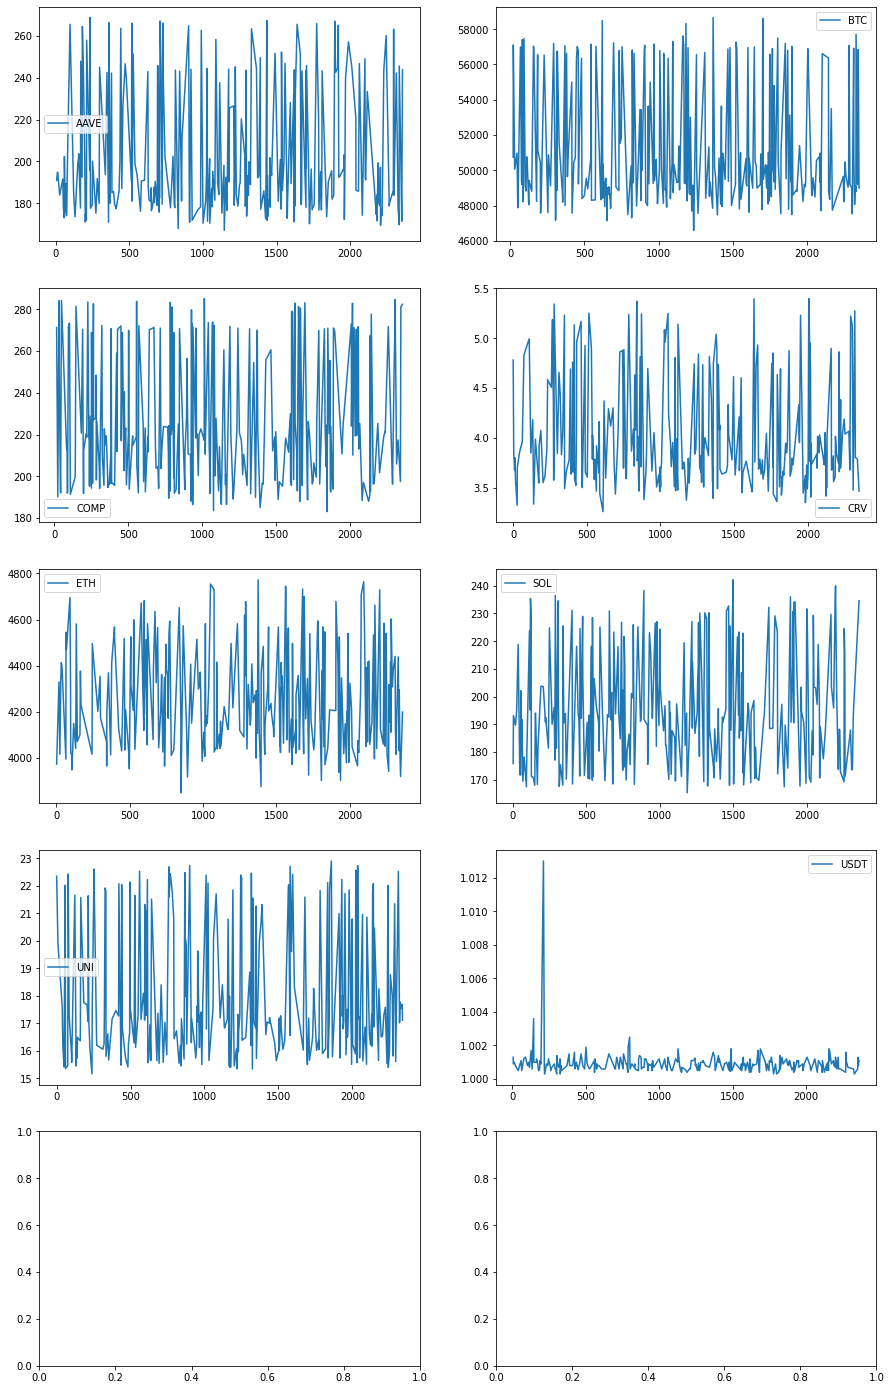

In [138]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [139]:
df['volumeUSD'] = df['close']*df['volume']

In [140]:
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,7.041235e+05,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,3.522644e+05,CRV,ETH
2,2021-12-10 15:00:00,182.4900,181.5000,175.2100,175.8600,7.373675e+04,1.296734e+07,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,7.352023e+07,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,1.341009e+07,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2355,2021-12-01 17:00:00,284.1400,284.8900,282.1800,282.3400,4.782140e+02,1.350189e+05,COMP,ETH
2356,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,2.308318e+05,AAVE,ETH
2357,2021-12-03 07:00:00,231.1080,231.8350,231.1080,234.5980,3.624890e+04,8.503920e+06,SOL,SOL
2358,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,5.729636e+07,ETH,ETH


In [143]:
df.groupby(['chain'])['volumeUSD'].sum().to_frame()

,volumeUSD
chain,
BTC,1.092882e+10
ETH,1.362536e+10
SOL,4.076604e+09
USDT,1.008247e+09
